Tugas mid test course NLP

Tawang sahro winanto

NLP machine learning

In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 15.3 MB/s 


In [ ]:
!pip install sequence

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sequence: filename=sequence-0.3.4-py3-none-any.whl size=5415 sha256=576c4183c83a5de9164d3c08bf3816ea3b2a801d880790f5d39e0aa61451f427
  Stored in directory: /root/.cache/pip/wheels/86/0f/5f/c8f0008d7a90c4511ea066fcabf9afa18194ae7644ec937d02
  Created wheel for daytime: filename=daytime-0.4-py3-none-any.whl size=2418 sha256=e180a91450b725df83cae381a260dbb5e5f5df2a0658cdf72a3344b4219c9b40
  Stored in directory: /root/.cache/pip/wheels/3c/fa/b5/121fe6d709bf3a89a03512710454c10382c49eb6bbc3577b22
Successfully built sequence daytime


In [ ]:
import nltk
import pandas as pd
import re
import tensorflow as tf
import time
import multiprocessing
import io
import gensim
import numpy as np
import matplotlib.pyplot as plt

import pickle
import keras
import nltk

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Activation, Embedding, LSTM, Bidirectional, Dropout, GRU
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from nltk.tokenize import TweetTokenizer
from collections import defaultdict
from datetime import timedelta
from gensim.models import word2vec
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('punkt')
from nltk.tokenize import word_tokenize

from google.colab import drive
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/MidTest Tawang sahro winanto/review_genshin.csv")
df.head()

reviewId             userName  \
0  6fb139b8-65ba-4a72-9b34-52791072cd01        Big L Gamings   
1  a6812bc1-ab78-425a-b974-0e2ede67fe8a       Lxyna Shouguns   
2  5a0558c6-eb98-492a-b976-a99a95a63a6f  nurul auliyah askar   
3  e47e01a0-e70e-4457-a49f-c2b01fa36a6e        Fuzzy Academy   
4  deda26ff-203d-4506-afb6-d65e4892d6bb      jhonson pratama   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AFdZu...   
1  https://play-lh.googleusercontent.com/a-/AFdZu...   
2  https://play-lh.googleusercontent.com/a-/AFdZu...   
3  https://play-lh.googleusercontent.com/a-/AFdZu...   
4  https://play-lh.googleusercontent.com/a/AItbvm...   

                                             content  score  thumbsUpCount  \
0  Untuk anniv kedepanya semoga tidak seperti yan...      1              0   
1  developer tolong perbaiki bug darah musuh yang...      1              0   
2  Aku sukaaa bangeet tapi saat mau lanjutin yang...      1              7   
3  Bisakah saya tidak mendapatkan b5 karakter di ...      1             14   
4  Jaringan lelet sekali,selalu aja (menghubungka...      1              2   

    reviewCreatedVersion                   at  \
0  3.0.0_9612129_9624836  2022-09-14 08:54:25   
1  3.0.0_9612129_9624836  2022-09-13 03:54:53   
2  3.0.0_9612129_9624836  2022-08-29 08:24:49   
3  3.0.0_9612129_9624836  2022-08-27 03:50:46   
4  3.0.0_9612129_9624836  2022-09-04 21:30:17   

                                        replyContent            repliedAt  
0                                                NaN                  NaN  
1                                                NaN                  NaN  
2  Halo, Traveler! Terima kasih atas dukungan Tra...  2022-09-14 15:50:49  
3  Halo, Traveler! Traveler dapat melihat aturan ...  2022-09-14 15:24:15  
4                                                NaN                  NaN

In [ ]:
#menampilkan data rating 1
df[df['score'] < 5]

reviewId             userName  \
0     6fb139b8-65ba-4a72-9b34-52791072cd01        Big L Gamings   
1     a6812bc1-ab78-425a-b974-0e2ede67fe8a       Lxyna Shouguns   
2     5a0558c6-eb98-492a-b976-a99a95a63a6f  nurul auliyah askar   
3     e47e01a0-e70e-4457-a49f-c2b01fa36a6e        Fuzzy Academy   
4     deda26ff-203d-4506-afb6-d65e4892d6bb      jhonson pratama   
...                                    ...                  ...   
1995  e75aab24-1941-4920-82d6-544b57c6a903       Clarissa Risma   
1996  51920e4d-2a6f-405b-876f-d62c32cfc731             DAVA A.R   
1997  41e867d5-4e95-41f3-9370-735155762a9f        manusia haram   
1998  496e297c-62a9-4c0f-8930-54b36b48ed8b           Adzani N.j   
1999  54d72cc7-ac31-44c6-8971-9ed0402c0078             wahyu DH   

                                              userImage  \
0     https://play-lh.googleusercontent.com/a-/AFdZu...   
1     https://play-lh.googleusercontent.com/a-/AFdZu...   
2     https://play-lh.googleusercontent.com/a-/AFdZu...   
3     https://play-lh.googleusercontent.com/a-/AFdZu...   
4     https://play-lh.googleusercontent.com/a/AItbvm...   
...                                                 ...   
1995  https://play-lh.googleusercontent.com/a-/AFdZu...   
1996  https://play-lh.googleusercontent.com/a-/AFdZu...   
1997  https://play-lh.googleusercontent.com/a-/AFdZu...   
1998  https://play-lh.googleusercontent.com/a/AItbvm...   
1999  https://play-lh.googleusercontent.com/a-/AFdZu...   

                                                content  score  thumbsUpCount  \
0     Untuk anniv kedepanya semoga tidak seperti yan...      1              0   
1     developer tolong perbaiki bug darah musuh yang...      1              0   
2     Aku sukaaa bangeet tapi saat mau lanjutin yang...      1              7   
3     Bisakah saya tidak mendapatkan b5 karakter di ...      1             14   
4     Jaringan lelet sekali,selalu aja (menghubungka...      1              2   
...                                                 ...    ...            ...   
1995  Mau download kok ngga bs y. Penyimpanan gua si...      1              0   
1996  Untuk Sementara Saya Kasih Bintang Satu Karna ...      1              6   
1997  Game nya berat banget,kayak cinta kita yang be...      1              0   
1998  Kenapa saya tidak bisa masuk ke game ini,game ...      1              2   
1999  Awal bagus tapi pertengahan suka keluar sendir...      1              0   

       reviewCreatedVersion                   at  \
0     3.0.0_9612129_9624836  2022-09-14 08:54:25   
1     3.0.0_9612129_9624836  2022-09-13 03:54:53   
2     3.0.0_9612129_9624836  2022-08-29 08:24:49   
3     3.0.0_9612129_9624836  2022-08-27 03:50:46   
4     3.0.0_9612129_9624836  2022-09-04 21:30:17   
...                     ...                  ...   
1995                    NaN  2022-01-13 00:53:45   
1996  2.4.0_5199000_5224067  2022-01-05 04:55:43   
1997                    NaN  2022-06-06 22:25:13   
1998  2.3.0_4786731_4861639  2021-12-13 05:45:20   
1999  1.0.0_1112729_1135452  2020-10-09 18:26:13   

                                           replyContent            repliedAt  
0                                                   NaN                  NaN  
1                                                   NaN                  NaN  
2     Halo, Traveler! Terima kasih atas dukungan Tra...  2022-09-14 15:50:49  
3     Halo, Traveler! Traveler dapat melihat aturan ...  2022-09-14 15:24:15  
4                                                   NaN                  NaN  
...                                                 ...                  ...  
1995  Kami mohon maaf atas ketidaknyamanan yang Anda...  2022-01-15 07:19:28  
1996                                                NaN                  NaN  
1997  Kami mohon maaf atas ketidaknyamanan yang Anda...  2022-06-15 10:43:59  
1998  Kami mohon maaf atas ketidaknyamanan yang Anda...  2021-12-15 02:48:09  
1999                                                N

In [ ]:
#menampilkan data rating 5
df[df['score'] >1]

reviewId                   userName  \
2000  58168b16-9a7b-40d9-85fb-1b0f48fddfb8                Dinda Naafi   
2001  15474d2b-eff3-4490-a858-125aa28ad4d4       Nurdiansyah Putra S.   
2002  cfcdfe87-7fc5-4572-97ec-0a3531628a08            Wilman Abisiena   
2003  b1ebfca5-8d11-4178-b5e9-ddfce7e60365               Haikal Fasha   
2004  eb3c229b-9f2d-404f-ac03-2d6aabd96080              Hilman Hilman   
...                                    ...                        ...   
3995  5b434707-9d50-4429-903f-0a371370508d       Alkindi Mulia Achmad   
3996  00ab8821-abad-4b2a-b64c-2d798bd37c9b  Nafhisya prisilla Santoso   
3997  516ab213-8acb-4ac5-98ad-b5b6c0f8a71c              Susilo Susilo   
3998  00d2a994-9c9d-4c6d-95c2-36adde3e91c6               Resha Palepi   
3999  abf0201e-c2d9-4701-8000-d7b2e4adb9ec                    A8 XXKT   

                                              userImage  \
2000  https://play-lh.googleusercontent.com/a/AItbvm...   
2001  https://play-lh.googleusercontent.com/a-/AFdZu...   
2002  https://play-lh.googleusercontent.com/a/AItbvm...   
2003  https://play-lh.googleusercontent.com/a-/AFdZu...   
2004  https://play-lh.googleusercontent.com/a-/AFdZu...   
...                                                 ...   
3995  https://play-lh.googleusercontent.com/a-/AFdZu...   
3996  https://play-lh.googleusercontent.com/a-/AFdZu...   
3997  https://play-lh.googleusercontent.com/a/AItbvm...   
3998  https://play-lh.googleusercontent.com/a-/AFdZu...   
3999  https://play-lh.googleusercontent.com/a/AItbvm...   

                                                content  score  thumbsUpCount  \
2000  Ini game grafiknya bagus, alur ceritanya juga ...      5             65   
2001  Dari segi UI menu mudah d pahami & tidak bikin...      5            443   
2002  Mungkin masih menjadi mobile game dgn tema ope...      5            272   
2003  Overall gamenya bagus, dari story gamenya, mek...      5            169   
2004  Hallo saya punya saran dari saya untuk memuask...      5             15   
...                                                 ...    ...            ...   
3995  Bagi yang bilang kalo dapat karakter yang sama...      5              1   
3996           Game nya seru bngt grafik nya juga bagus      5              0   
3997  Hallo pihak hoyoverse Indonesia, saya sangat m...      5              0   
3998        Penuh dengan updatean berat, tp seru banget      5              0   
3999  Game nya keren aku sangat suka ;-) Dan bisa me...      5              0   

       reviewCreatedVersion                   at replyContent repliedAt  
2000  3.0.0_9612129_9624836  2022-09-08 08:19:02          NaN       NaN  
2001  3.0.0_9612129_9624836  2022-08-24 00:20:39          NaN       NaN  
2002  3.0.0_9612129_9624836  2022-08-25 01:57:44          NaN       NaN  
2003  3.0.0_9612129_9624836  2022-08-26 15:33:09          NaN       NaN  
2004  3.0.0_9612129_9624836  2022-09-09 02:38:22          NaN       NaN  
...                     ...                  ...          ...       ...  
3995  1.2.0_1565149_1627898  2021-01-25 16:10:22          NaN       NaN  
3996  2.8.0_7997424_8078355  2022-08-24 05:38:36          NaN       NaN  
3997                    NaN  2022-08-23 02:39:03          NaN       NaN  
3998  2.7.0_6933856_6989239  2022-07-11 08:10:27          NaN       NaN  
3999  2.7.0_6933856_6989239  2022-07-09 11:58:01          NaN       NaN  

[2000 rows x 10 columns]

In [ ]:
# menampilkan data hanya data username ,score,content
df[['userName', 'score', 'content']]

userName  score  \
0                 Big L Gamings      1   
1                Lxyna Shouguns      1   
2           nurul auliyah askar      1   
3                 Fuzzy Academy      1   
4               jhonson pratama      1   
...                         ...    ...   
3995       Alkindi Mulia Achmad      5   
3996  Nafhisya prisilla Santoso      5   
3997              Susilo Susilo      5   
3998               Resha Palepi      5   
3999                    A8 XXKT      5   

                                                content  
0     Untuk anniv kedepanya semoga tidak seperti yan...  
1     developer tolong perbaiki bug darah musuh yang...  
2     Aku sukaaa bangeet tapi saat mau lanjutin yang...  
3     Bisakah saya tidak mendapatkan b5 karakter di ...  
4     Jaringan lelet sekali,selalu aja (menghubungka...  
...                                                 ...  
3995  Bagi yang bilang kalo dapat karakter yang sama...  
3996           Game nya seru bngt grafik nya juga bagus  
3997  Hallo pihak hoyoverse Indonesia, saya sangat m...  
3998        Penuh dengan updatean berat, tp seru banget  
3999  Game nya keren aku sangat suka ;-) Dan bisa me...  

[4000 rows x 3 columns]




---


Tahap preprocesing data

  1.case folding

  2.filtering

  3.tokenization

  4.Konversi Slangword

  5.Stopword Removal

  6.Stemming


---



1.casefolding

In [ ]:
dfc = df['content']
print(dfc[:4])

0    Untuk anniv kedepanya semoga tidak seperti yan...
1    developer tolong perbaiki bug darah musuh yang...
2    Aku sukaaa bangeet tapi saat mau lanjutin yang...
3    Bisakah saya tidak mendapatkan b5 karakter di ...
Name: content, dtype: object


In [ ]:
#casefolding
dfcf = dfc.str.lower()
dfcf.head()

0    untuk anniv kedepanya semoga tidak seperti yan...
1    developer tolong perbaiki bug darah musuh yang...
2    aku sukaaa bangeet tapi saat mau lanjutin yang...
3    bisakah saya tidak mendapatkan b5 karakter di ...
4    jaringan lelet sekali,selalu aja (menghubungka...
Name: content, dtype: object

2.filtering

In [ ]:
#filtering

#url
filtering_url = [re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|
\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',
 " ", tweet) for tweet in dfcf]
#cont
filtering_cont = [re.sub(r'\(cont\)'," ", tweet)for tweet in filtering_url]
#punctuatuion
filtering_punctuation = [re.sub('[!"”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', ' ', tweet) for tweet in filtering_cont]
#hapus simbol'[!#?,.:";@()-_/\']'
#  hapus #tagger
filtering_tagger = [re.sub(r'#([^\s]+)', '', tweet) for tweet in filtering_punctuation]
#numeric
filtering_numeric = [re.sub(r'\d+', ' ', tweet) for tweet in filtering_tagger]

# # filtering RT , @ dan #
# fungsi_clen_rt = lambda x: re.compile('\#').sub('', re.compile('rt @').sub('@', x, count=1).strip())
# clean = [fungsi_clen_rt for tweet in filtering_numeric]

data_filtering = pd.Series(filtering_numeric)


In [ ]:
data_filtering

0       untuk anniv kedepanya semoga tidak seperti yan...
1       developer tolong perbaiki bug darah musuh yang...
2       aku sukaaa bangeet tapi saat mau lanjutin yang...
3       bisakah saya tidak mendapatkan b  karakter di ...
4       jaringan lelet sekali selalu aja  menghubungka...
                              ...                        
3995    bagi yang bilang kalo dapat karakter yang sama...
3996             game nya seru bngt grafik nya juga bagus
3997    hallo pihak hoyoverse indonesia  saya sangat m...
3998          penuh dengan updatean berat  tp seru banget
3999    game nya keren aku sangat suka     dan bisa me...
Length: 4000, dtype: object

3.tokenization

In [ ]:
#tokenization
data_tokens = [word_tokenize(line) for line in data_filtering]
print(data_tokens)

[['untuk', 'anniv', 'kedepanya', 'semoga', 'tidak', 'seperti', 'yang', 'dulu', 'tolong', 'situ', 'beri', 'apresiasi', 'ke', 'player', 'bukan', 'cuman', 'player', 'aja', 'yang', 'ngasih', 'apresiasi', 'ke', 'situ', 'kalau', 'memuaskan', 'nanti', 'saya', 'tambahin', 'bintang', 'lagi'], ['developer', 'tolong', 'perbaiki', 'bug', 'darah', 'musuh', 'yang', 'terkadang', 'suka', 'hilang', 'itu', 'membuat', 'saya', 'kesulitan', 'untuk', 'farming', 'jika', 'sudah', 'di', 'perbaiki', 'akan', 'saya', 'beri', 'bintang', 'lagi'], ['aku', 'sukaaa', 'bangeet', 'tapi', 'saat', 'mau', 'lanjutin', 'yang', 'request', 'kembang', 'api', 'yang', 'pertama', 'kali', 'travelers', 'masuk', 'inazuma', 'itu', 'gw', 'kaga', 'bisa', 'masuk', 'ruang', 'bawah', 'tanah', 'loding', 'mulu', 'dari', 'kemarin', 'padahal', 'jaringan', 'bagus', 'aku', 'sudah', 'stel', 'stel', 'tapi', 'kagak', 'guna', 'dowload', 'apk', 'membantu', 'kagak', 'guna', 'bersihkan', 'ruang', 'juga', 'gak', 'guna', 'hapus', 'data', 'change', 'kagak

4.Konversi Slangword

In [ ]:
#slang word
path_dataslang = open("/content/drive/My Drive/MidTest Tawang sahro winanto/kamus kata baku.csv")
dataslang = pd.read_csv(path_dataslang, encoding = 'utf-8', header=None, sep=";")

def replaceSlang(word):
  if word in list(dataslang[0]):
    indexslang = list(dataslang[0]).index(word)
    return dataslang[1][indexslang]
  else:
    return word

data_formal = []
for data in data_tokens:
  data_clean = [replaceSlang(word) for word in data]
  data_formal.append(data_clean)
len_data_formal = len(data_formal)
print(data_formal)
len_data_formal

[['untuk', 'anniv', 'kedepanya', 'semoga', 'tidak', 'seperti', 'yang', 'dulu', 'tolong', 'situ', 'beri', 'apresiasi', 'ke', 'player', 'bukan', 'cuma', 'player', 'saja', 'yang', 'memberi', 'apresiasi', 'ke', 'situ', 'kalau', 'memuaskan', 'nanti', 'saya', 'tambahkan', 'bintang', 'lagi'], ['developer', 'tolong', 'perbaiki', 'bug', 'darah', 'musuh', 'yang', 'terkadang', 'suka', 'hilang', 'itu', 'membuat', 'saya', 'kesulitan', 'untuk', 'farming', 'jika', 'sudah', 'di', 'perbaiki', 'akan', 'saya', 'beri', 'bintang', 'lagi'], ['aku', 'suka', 'abnget', 'tapi', 'saat', 'mau', 'lanjutkan', 'yang', 'permintaan', 'kembang', 'api', 'yang', 'pertama', 'kali', 'travelers', 'masuk', 'inazuma', 'itu', 'saya', 'tidak', 'bisa', 'masuk', 'ruang', 'bawah', 'tanah', 'loding', 'terus', 'dari', 'kemarin', 'padahal', 'jaringan', 'bagus', 'aku', 'sudah', 'stel', 'stel', 'tapi', 'tidak', 'guna', 'dowload', 'apk', 'membantu', 'tidak', 'guna', 'bersihkan', 'ruang', 'juga', 'tidak', 'guna', 'hapus', 'data', 'change

4000

5.Stopword Removal

In [ ]:
nltk.download('stopwords')
default_stop_words = nltk.corpus.stopwords.words('indonesian')
stopwords = set(default_stop_words)

def removeStopWords(line, stopwords):
  words = []
  for word in line:
    word=str(word)
    word = word.strip()
    if word not in stopwords and word != "" and word != "&":
      words.append(word)

  return words
data_notstopword = [removeStopWords(line,stopwords) for line in data_formal]
len(data_notstopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


4000

In [ ]:
data_notstopword

[['anniv',
  'kedepanya',
  'semoga',
  'tolong',
  'situ',
  'apresiasi',
  'player',
  'player',
  'apresiasi',
  'situ',
  'memuaskan',
  'tambahkan',
  'bintang'],
 ['developer',
  'tolong',
  'perbaiki',
  'bug',
  'darah',
  'musuh',
  'terkadang',
  'suka',
  'hilang',
  'kesulitan',
  'farming',
  'perbaiki',
  'bintang'],
 ['suka',
  'abnget',
  'lanjutkan',
  'permintaan',
  'kembang',
  'api',
  'kali',
  'travelers',
  'masuk',
  'inazuma',
  'masuk',
  'ruang',
  'tanah',
  'loding',
  'kemarin',
  'jaringan',
  'bagus',
  'stel',
  'stel',
  'dowload',
  'apk',
  'membantu',
  'bersihkan',
  'ruang',
  'hapus',
  'data',
  'change',
  'memperbaiki',
  'sistem',
  'genshin',
  'loding',
  'layarnya',
  'item',
  'masuk',
  'pintu',
  'rahasia'],
 ['b',
  'karakter',
  'pity',
  'merah',
  'b',
  'karakter',
  'kudapatkan',
  'pity',
  'merah',
  'berkontribusi',
  'top',
  'up',
  'teman',
  'mengeluarkan',
  'sepeserpun',
  'uang',
  'game',
  'menang',
  'rate',
  'off',

6.Stemming

In [ ]:
white_list = ["bali"] #ini perlu/tidak perlu diubah karena dianggap sastrawi sebagai imbuhan i

factory = StemmerFactory()
ind_stemmer = factory.create_stemmer()
def stemmer(line):
    temp = list()
    for word in line:
      if(word not in white_list):
        word = ind_stemmer.stem(word)
      if(len(word)>3):
        temp.append(word)
    return temp

reviews = [stemmer (line) for line in data_notstopword]
print(reviews)

[['anniv', 'depa', 'moga', 'tolong', 'situ', 'apresiasi', 'player', 'player', 'apresiasi', 'situ', 'muas', 'tambah', 'bintang'], ['developer', 'tolong', 'baik', 'darah', 'musuh', 'terkadang', 'suka', 'hilang', 'sulit', 'farming', 'baik', 'bintang'], ['suka', 'abnget', 'lanjut', 'minta', 'kembang', 'kali', 'travelers', 'masuk', 'inazuma', 'masuk', 'ruang', 'tanah', 'loding', 'kemarin', 'jaring', 'bagus', 'stel', 'stel', 'dowload', 'bantu', 'ruang', 'hapus', 'data', 'change', 'baik', 'sistem', 'genshin', 'loding', 'layar', 'item', 'masuk', 'pintu', 'rahasia'], ['karakter', 'pity', 'merah', 'karakter', 'dapat', 'pity', 'merah', 'kontribusi', 'teman', 'keluar', 'peser', 'uang', 'game', 'menang', 'rate', 'kali', 'kali', 'pity', 'kuning'], ['jaring', 'lambat', 'hubung', 'server', 'loading', 'ulang', 'jaring', 'internet', 'bagus', 'buka', 'youtube', 'lancar', 'main', 'genshin', 'muas', 'jaring', 'buruk', 'gamenya'], ['butuh', 'fitur', 'lewat', 'dialog', 'main', 'batas', 'tinggal', 'bebagai', 

sentence conversion

In [ ]:
#Pembuatan Kamus kata

t = Tokenizer()
fit_text = reviews
t.fit_on_texts(fit_text)

#Pembuatan Id masing-masing kata
sequences = t.texts_to_sequences(reviews)

#hapus duplikat kata yang muncul
list_set_sequence = [list(dict.fromkeys(seq)) for seq in sequences]

#mencari max length sequence

def FindMaxLength(lst):
  maxList = max((x) for x in lst)
  maxLength = max(len(x) for x in lst )
  return maxList, maxLength

# Driver Code
max_seq, max_length_seq = FindMaxLength(list_set_sequence)
jumlah_index = len(t.word_index) +1



print('jumlah index : ',jumlah_index, '\n')

print('word_index : ',t.word_index,"\n")

print('index kalimat asli '': ', sequences,'\n')

print('kalimat tenpa duplikat : ',list_set_sequence, '\n')
print('panjang max kalimat : ', max_length_seq, 'kata', '\n')

print('kalimat terpanjang setelah dihapus duplikat : ', max_seq,'\n')

count_word = [len(i) for i in list_set_sequence]
print('list panjeng kalimat : ', count_word)
max_len_word = max(count_word)

print (max_len_word)

jumlah index :  5682 

word_index :  {'game': 1, 'bagus': 2, 'main': 3, 'tolong': 4, 'banget': 5, 'grafik': 6, 'baik': 7, 'cerita': 8, 'karakter': 9, 'update': 10, 'download': 11, 'gamenya': 12, 'genshin': 13, 'data': 14, 'kasih': 15, 'player': 16, 'suka': 17, 'seru': 18, 'mihoyo': 19, 'mohon': 20, 'pakai': 21, 'bintang': 22, 'masuk': 23, 'gacha': 24, 'event': 25, 'impact': 26, 'kali': 27, 'bosan': 28, 'tarik': 29, 'susah': 30, 'lancar': 31, 'keren': 32, 'terimakasih': 33, 'developer': 34, 'quest': 35, 'gameplay': 36, 'artefak': 37, 'moga': 38, 'tambah': 39, 'akun': 40, 'segi': 41, 'biar': 42, 'coba': 43, 'saran': 44, 'jaring': 45, 'lumayan': 46, 'habis': 47, 'fitur': 48, 'cepat': 49, 'sistem': 50, 'resin': 51, 'kecewa': 52, 'orang': 53, 'berat': 54, 'mudah': 55, 'world': 56, 'login': 57, 'selesai': 58, 'mantap': 59, 'simpan': 60, 'ulang': 61, 'open': 62, 'grafis': 63, 'tunggu': 64, 'alur': 65, 'kadang': 66, 'misi': 67, 'ping': 68, 'hilang': 69, 'device': 70, 'kurang': 71, 'hapus': 72,

In [ ]:
#Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
padding= pad_sequences([list(list_set_sequence[i]) for i in range(len(list_set_sequence))], maxlen= max_len_word, padding='pre')
padding[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  348, 1485,   38,    4,  432,  825,   16,  170,   39,
          22],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   34,    

Split dataset

In [ ]:
label=pd.get_dummies(df['score']).values
# Split dataset (training & testing)
#from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(padding, label, test_size=0.2)
#y_train_tr = to_categorical(y_train, num_classes=3)
#y_test_tr = to_categorical(y_test, num_classes=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3200, 78) (3200, 2)
(800, 78) (800, 2)


Embedding Layer (Konversi Padding to Vector)

In [ ]:
# implementasi konversi hasil padding menjadi vektor
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/MidTest Tawang sahro winanto/w2v_idwiki_sg_400_HS.model')

EMBEDDING_DIM=400 #diganti sesuai dimensi
vocabulary_size= jumlah_index  #min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in t.word_index.items():
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

In [ ]:
from keras.layers import Input
input_embedding = Input(shape=(padding.shape))
embedding = embedding_layer(input_embedding)
embedding

<KerasTensor: shape=(None, 4000, 78, 400) dtype=float32 (created by layer 'embedding')>

buat model deep learning menggunakan LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

def LSTMmodel(X_train, y_train,X_test, y_test):
  model = Sequential()
  model.add(Embedding(jumlah_index, EMBEDDING_DIM, input_length=max_len_word))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(800, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  epochs = 15
  batch_size = 64
  history =model.fit(X_train, y_train,validation_data = (X_test, y_test), epochs=epochs)

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  return history,model

Epoch 1/15
100/100 [==============================] - 28s 233ms/step - loss: 0.6181 - accuracy: 0.6847 - val_loss: 0.5419 - val_accuracy: 0.7387
Epoch 2/15
100/100 [==============================] - 21s 205ms/step - loss: 0.3641 - accuracy: 0.8462 - val_loss: 0.3958 - val_accuracy: 0.8225
Epoch 3/15
100/100 [==============================] - 21s 208ms/step - loss: 0.2302 - accuracy: 0.9084 - val_loss: 0.4462 - val_accuracy: 0.8100
Epoch 4/15
100/100 [==============================] - 21s 211ms/step - loss: 0.1364 - accuracy: 0.9509 - val_loss: 0.5409 - val_accuracy: 0.8175
Epoch 5/15
100/100 [==============================] - 21s 206ms/step - loss: 0.0755 - accuracy: 0.9741 - val_loss: 0.6275 - val_accuracy: 0.7837
Epoch 6/15
100/100 [==============================] - 22s 217ms/step - loss: 0.0582 - accuracy: 0.9806 - val_loss: 0.7583 - val_accuracy: 0.8025
Epoch 7/15
100/100 [==============================] - 21s 209ms/step - loss: 0.0289 - accuracy: 0.9900 - val_loss: 0.9552 - val_ac

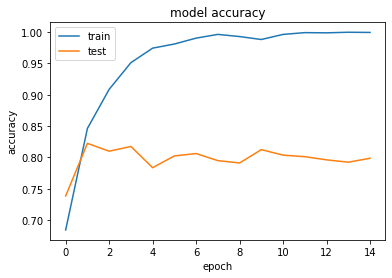

25/25 [==============================] - 1s 37ms/step - loss: 1.4880 - accuracy: 0.7987


In [ ]:
# Training model BiLSTM
history, train = LSTMmodel(X_train,y_train,X_test,y_test)
test = train.evaluate(x=X_test, y=y_test)